In [1]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
import ibsen


DAY = 86400.
AU = 1.5e13

First, initialize the system you want to work with. I use the cartesian coordinate system with the origin in the optical star, the x-axis is directed to the periastron of the pulsar orbit, z-axis is directed as the angular velocity of the pulsar $\mathbf{\Omega}_{puls}$, y-axis is perpendicular to $x$ and $y$ directed so that $\mathbf{e}_x \times \mathbf{e}_y = \mathbf{e}_z$.

![coords](fig_orbit_coords.jpg)

For this, create a class ``orb:Orbit`` that would be passed as an argument in future to everything else. Once it is created, you can obtain some orbit parameters (orbital periond, eccentricity, etc.) or the arrays of coordinates (x, y, r, ...) along the orbit.


The simplest way to do it is like this:

In [2]:
from ibsen.orbit import Orbit
### You always can do that:
#Orbit?

The psrb orbit parameters are
T [days] =  1236.724526
e =  0.874
nu_los [rad] =  2.3
a [au] =  7.169114567926924
b [au] =  3.4836585940129043
r_per [au] =  0.9033084355587925
r_apo [au] =  13.434920700295056
r at t = 250 days [AU] =  150614430581056.47
true anomaly at t = 250 days =  2.828127182902617
time for the true anomaly of nu = 90deg =  1406802.5954626538
time [days] of LoS crossing is 57.479789175873094
new T [days] =  800.0
my T [days] =  1500.0


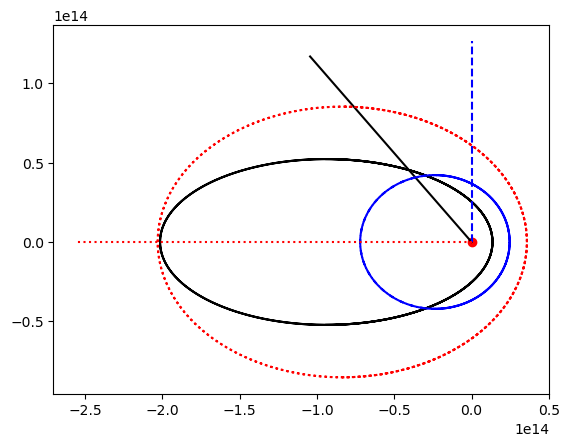

In [3]:
plt.close('all')

"""
Here we do the same as in full_tutorial but also show some additional features you may wish to use while working
with orbit:Orbit. Also we do not use peek() method here, making all plots by 'manually'.
"""
############################################################################################################################
"""
This is the simplest way of initializing an orbit: by a keyword sys_name = ...
The only available options are
(1) 'psrb' (PSR B1259-63), or
(2) 'rb' and (3) 'bw' for typical values for redback and black widow spider pulsar systems.
(3) 'ls5039', ########## beware! the parameters need to be re-checked
(4) 'psrj2032', ########## beware! the parameters need to be re-checked
(5) 'ls61', ########## beware! the parameters need to be re-checked
(6) 'test' --- which is a test gamma-ray binary in Sushch, van Soelen 2023.

n is the number of points on the orbit to tabulate, None is default (orbit is not tabulated).
"""

sys_name = 'psrb' 
orb = Orbit(sys_name = sys_name, n=1003)

print(f'The {sys_name} orbit parameters are')
print('T [days] = ', orb.T / DAY) # orbital period
print('e = ', orb.e) # eccentricity
print('nu_los [rad] = ', orb.nu_los) # the angle between the star-to-periastron direction and the direction to the observer
print('a [au] = ', orb.a / AU) # major half-axis of the orbit
print('b [au] = ', orb.b / AU) # minor half-axis of the orbit
print('r_per [au] = ', orb.r_periastr / AU) # periastron orbital separation
print('r_apo [au] = ', orb.r_apoastr / AU) # apoastron orbital separation
print('r at t = 250 days [AU] = ', orb.r(t = 250 * DAY)) # the S-P distance at t = 250 days after peiastron passage
print('true anomaly at t = 250 days = ', orb.true_an(t = 250 * DAY)) # the true anomaly at t = 250 days after peiastron passage
print('time for the true anomaly of nu = 90deg = ', 
      orb.t_from_true_an(nu = 90 / 180 * np.pi)) # t when the true anomaly is 90 deg
print('time [days] of LoS crossing is', orb.t_los / DAY)


plt.plot(orb.xtab, orb.ytab, color='k') # plot the orbit
plt.scatter(x=0, y=0, color='r') # place an optical star in the center of coordinates
plt.plot([0, 3 * orb.b * cos(orb.nu_los)],
         [0, 3 * orb.b * sin(orb.nu_los)],
         color='k', ls='-') # plot a line from the optical star to the direction of an observer

"""
You can pass period T, e, total mass M, and nu_los, incl_los as arguments, and these 
explicit parameters overwrite the default ones. Also, let's skip incl_los because we 
don't need it now. We can pass the argument 
"""

orb_new = Orbit(sys_name = 'new_orbit', M=7*2e33, T = 800. * DAY, e = 0.49, nu_los=pi/2,
               allow_missing=True # if you're ABSOLUTELY 100% sure that your orbit does not need other parameters,
                                  # you can fill everything else with None with this keyword. Default False
               )

print('new T [days] = ', orb_new.T / DAY) # new orbital period


plt.plot(orb_new.xtab, orb_new.ytab, color='b', ls = '--') # plot the new orbit
plt.plot([0, 3 * orb_new.b * cos(orb_new.nu_los)],
         [0, 3 * orb_new.b * sin(orb_new.nu_los)],
         color='b', ls='--')

"""
Or you can pass sys_name = some dictionary that should contain the following values:

        [honestly, for the orbit we need only period, total mass, eccentricity, and nu_los. Everything
        else will be needed later.]
"""

orb_my_dict = {
             'T': 1500 * DAY, # the orbital period [s]. Necessary for orbit
             'e': 0.7, # eccentriciry. Necessary for orbit
             'M': 30. * 2e33, # total mass m1 + m2 [g]. The code does NOT check that M = Mopt + M_ns. Necessary for orbit
             'D': 3e3 * 3e18, # the distance to the system [cm]. Necessary for spectrum (later)
             'Ropt': 12 * 7e10, # the optical star radius [cm]. Necessary for winds (later)
             'Topt': 3.4e3, # the optical star effective temperature [K]. Necessary for winds (later)
             'Mopt': 28.6 * 2e33, # the optical star mass [g]. Necessary for winds but not used, can be skipped
             'nu_los': pi, # the angle between the star-to-periastron direction
                          # and the direction to the observer (= 3pi/2 - \omega) [rad]
                          # Used later
             'incl_los': pi/6 # the angle between the orbit normal (n || \Omega_orb)
                          # and the direction to the observer [rad]
                          # Used later
           }

orb_my = Orbit(sys_name = 'orbit_with_dict', sys_params=orb_my_dict) # again, if you explicitly set something as an argument here,
                                                                     # it overrites the value from the dictionary

print('my T [days] = ', orb_my.T / DAY) 


plt.plot(orb_my.xtab, orb_my.ytab, color='r', ls = ':')
plt.plot([0, 3 * orb_my.b * cos(orb_my.nu_los)],
         [0, 3 * orb_my.b * sin(orb_my.nu_los)],
         color='r', ls=':') # plot a line from the optical star to the direction of an observer
plt.show()

And here is how these orbit can be drawn with `peek()` function (and let's also put a point of T/4 at every orbit):

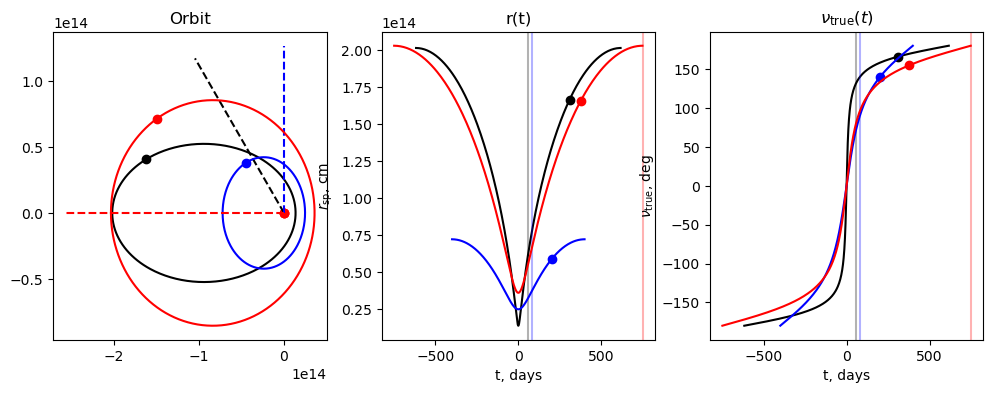

In [4]:
plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
orb.peek(ax=ax, color='k', times_pos=(orb.T/4,))
orb_new.peek(ax=ax, color='b', times_pos=(orb_new.T/4,))
orb_my.peek(ax=ax, color='r', times_pos=(orb_my.T/4,))
plt.show()